In [1]:
import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from timebudget import timebudget

from cplAE_MET.utils.load_config import load_config
from cplAE_MET.utils.dataset import MET_exc_inh

from cplAE_MET.models.subnetworks_M import AE_M
from cplAE_MET.models.subnetworks_E import AE_E
from cplAE_MET.models.subnetworks_ME import AE_ME_int
from cplAE_MET.models.subnetworks_T import AE_T
from cplAE_MET.models.torch_utils import MET_dataset, min_var_loss
from torch.utils.data import DataLoader

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dir_pth = load_config('config.toml')
dat = MET_exc_inh.from_file(dir_pth['MET_data'])
train_ind, val_ind = dat.train_val_split(fold=0, n_folds=10, seed=0)
train_dat = dat[train_ind,:]
val_dat = dat[val_ind,:]

In [3]:
train_dataset = MET_dataset(train_dat, device=device)
train_dataloader = DataLoader(train_dataset, batch_size=1000, shuffle=True, drop_last=True)

val_dataset = MET_dataset(val_dat, device=device)
val_dataloader = DataLoader(train_dataset, batch_size=len(val_dataset), shuffle=False)

dataset = MET_dataset(dat, device=device)
dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=False)

In [4]:
with timebudget('dataloading for 1 training epoch'):
    for batch in iter(train_dataloader):
        pass

dataloading for 1 training epoch took 1.994sec


In [5]:
from itertools import chain

# Model init -----------
model_config = dict(latent_dim=2,
                    batch_size=1000,
                    T=dict(dropout_p=0.2),
                    E=dict(gnoise_std_frac=0.05,
                           dropout_p=0.2))
ae_t = AE_T(config=model_config)
ae_e = AE_E(config=model_config, gnoise_std=train_dataset.gnoise_std)
ae_m = AE_M(config=model_config)

ae_t.to(device)
ae_m.to(device)
ae_e.to(device)

optimizer = torch.optim.Adam(chain(ae_e.parameters(),ae_m.parameters(), ae_t.parameters()), lr=0.001)

In [8]:
def plot_z(zm,ze,zt,dat,xlim=(-5,5),ylim=(-5,5)):
    tonumpy = lambda x:x.detach().to('cpu').numpy()
    zt = tonumpy(zt)
    ze = tonumpy(ze)
    zm = tonumpy(zm)
    f,ax = plt.subplots(1,3, figsize=(6,2))
    ax[0].scatter(zm[:,0],zm[:,1],c=dat.cluster_color,s=1)
    ax[0].set(title='M')
    ax[1].scatter(ze[:,0],ze[:,1],c=dat.cluster_color,s=1)
    ax[1].set(title='E')
    ax[2].scatter(zt[:,0],zt[:,1],c=dat.cluster_color,s=1)
    ax[2].set(title='T')
    for a in ax: a.set(xlim=xlim, ylim=ylim)
    plt.tight_layout()
    plt.show()

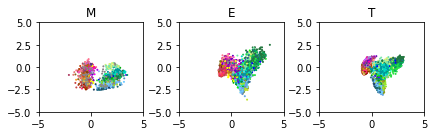

epoch: 19 loss: 11.69292 loss_rec_t: 4.88063 loss_rec_e: 0.19283 loss_rec_m: 0.60544 loss_cpl_me: 2.79063 loss_cpl_mt: 2.35704 loss_cpl_te: 0.86635 


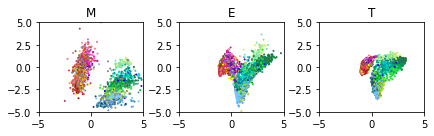

epoch: 39 loss: 11.28510 loss_rec_t: 4.43710 loss_rec_e: 0.18572 loss_rec_m: 0.62215 loss_cpl_me: 2.86886 loss_cpl_mt: 2.34887 loss_cpl_te: 0.82240 


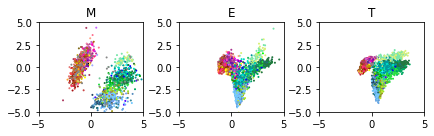

epoch: 59 loss: 8.66798 loss_rec_t: 4.24968 loss_rec_e: 0.19146 loss_rec_m: 0.62192 loss_cpl_me: 1.79019 loss_cpl_mt: 1.20587 loss_cpl_te: 0.60886 


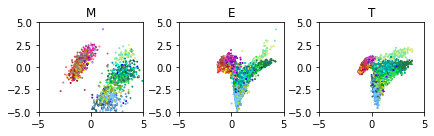

epoch: 79 loss: 8.16022 loss_rec_t: 4.15161 loss_rec_e: 0.18643 loss_rec_m: 0.62423 loss_cpl_me: 1.53421 loss_cpl_mt: 1.16100 loss_cpl_te: 0.50274 


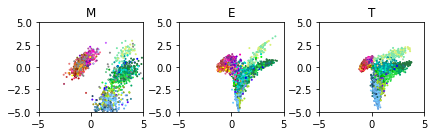

epoch: 99 loss: 7.19365 loss_rec_t: 3.95622 loss_rec_e: 0.18536 loss_rec_m: 0.59047 loss_cpl_me: 1.19893 loss_cpl_mt: 0.86534 loss_cpl_te: 0.39732 


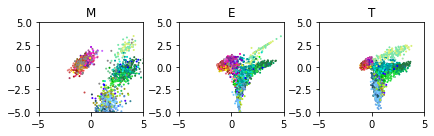

epoch: 119 loss: 6.76630 loss_rec_t: 3.86886 loss_rec_e: 0.18092 loss_rec_m: 0.62682 loss_cpl_me: 1.12004 loss_cpl_mt: 0.55516 loss_cpl_te: 0.41450 


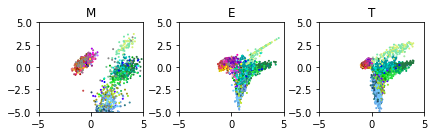

epoch: 139 loss: 6.96488 loss_rec_t: 3.80250 loss_rec_e: 0.17812 loss_rec_m: 0.66682 loss_cpl_me: 1.22921 loss_cpl_mt: 0.57868 loss_cpl_te: 0.50955 


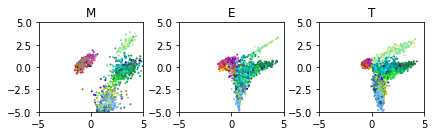

epoch: 159 loss: 6.41413 loss_rec_t: 3.59254 loss_rec_e: 0.17423 loss_rec_m: 0.64192 loss_cpl_me: 1.08643 loss_cpl_mt: 0.59853 loss_cpl_te: 0.32047 


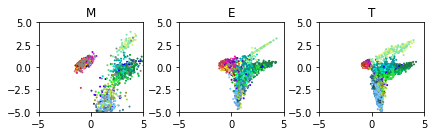

epoch: 179 loss: 6.04642 loss_rec_t: 3.54459 loss_rec_e: 0.17833 loss_rec_m: 0.62687 loss_cpl_me: 0.88031 loss_cpl_mt: 0.49250 loss_cpl_te: 0.32382 


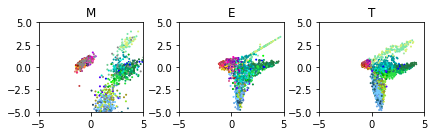

epoch: 199 loss: 5.76908 loss_rec_t: 3.48833 loss_rec_e: 0.18169 loss_rec_m: 0.59327 loss_cpl_me: 0.75680 loss_cpl_mt: 0.44928 loss_cpl_te: 0.29971 


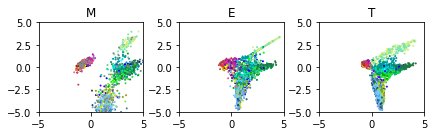

epoch: 219 loss: 5.39254 loss_rec_t: 3.41974 loss_rec_e: 0.16984 loss_rec_m: 0.63693 loss_cpl_me: 0.56930 loss_cpl_mt: 0.33353 loss_cpl_te: 0.26321 


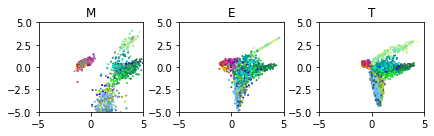

epoch: 239 loss: 5.51253 loss_rec_t: 3.26842 loss_rec_e: 0.16848 loss_rec_m: 0.65453 loss_cpl_me: 0.71405 loss_cpl_mt: 0.41582 loss_cpl_te: 0.29122 


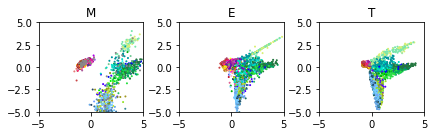

epoch: 259 loss: 5.65359 loss_rec_t: 3.22144 loss_rec_e: 0.16871 loss_rec_m: 0.62071 loss_cpl_me: 0.89025 loss_cpl_mt: 0.46788 loss_cpl_te: 0.28461 


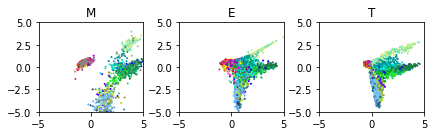

epoch: 279 loss: 5.53864 loss_rec_t: 3.21763 loss_rec_e: 0.17571 loss_rec_m: 0.62200 loss_cpl_me: 0.75242 loss_cpl_mt: 0.47433 loss_cpl_te: 0.29653 


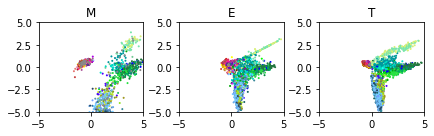

epoch: 299 loss: 4.98170 loss_rec_t: 3.14227 loss_rec_e: 0.17038 loss_rec_m: 0.61472 loss_cpl_me: 0.48228 loss_cpl_mt: 0.34578 loss_cpl_te: 0.22627 


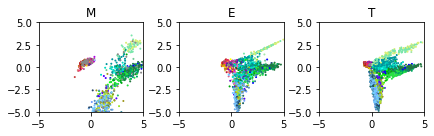

epoch: 319 loss: 5.00408 loss_rec_t: 3.12834 loss_rec_e: 0.16554 loss_rec_m: 0.64955 loss_cpl_me: 0.53496 loss_cpl_mt: 0.29847 loss_cpl_te: 0.22721 


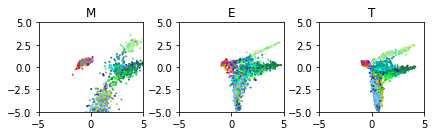

epoch: 339 loss: 5.13078 loss_rec_t: 3.14946 loss_rec_e: 0.17584 loss_rec_m: 0.63501 loss_cpl_me: 0.53339 loss_cpl_mt: 0.27994 loss_cpl_te: 0.35714 


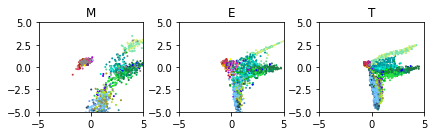

epoch: 359 loss: 4.59535 loss_rec_t: 3.10324 loss_rec_e: 0.16461 loss_rec_m: 0.63900 loss_cpl_me: 0.33031 loss_cpl_mt: 0.19869 loss_cpl_te: 0.15951 


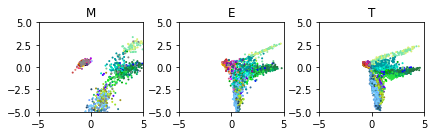

epoch: 379 loss: 4.86964 loss_rec_t: 3.10030 loss_rec_e: 0.16113 loss_rec_m: 0.64732 loss_cpl_me: 0.47542 loss_cpl_mt: 0.28293 loss_cpl_te: 0.20253 


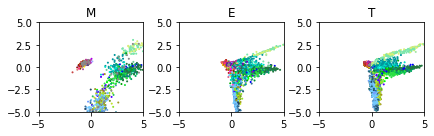

epoch: 399 loss: 4.73773 loss_rec_t: 3.12312 loss_rec_e: 0.16179 loss_rec_m: 0.62043 loss_cpl_me: 0.41654 loss_cpl_mt: 0.25080 loss_cpl_te: 0.16505 


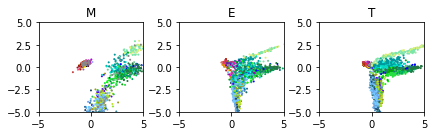

epoch: 419 loss: 4.58183 loss_rec_t: 3.07111 loss_rec_e: 0.15829 loss_rec_m: 0.60885 loss_cpl_me: 0.35906 loss_cpl_mt: 0.22333 loss_cpl_te: 0.16118 


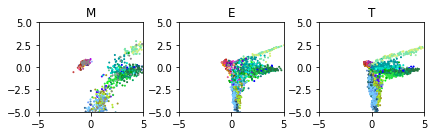

epoch: 439 loss: 4.66141 loss_rec_t: 3.05022 loss_rec_e: 0.16197 loss_rec_m: 0.59852 loss_cpl_me: 0.43692 loss_cpl_mt: 0.18367 loss_cpl_te: 0.23011 


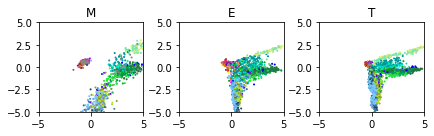

epoch: 459 loss: 4.64133 loss_rec_t: 3.03597 loss_rec_e: 0.14748 loss_rec_m: 0.58466 loss_cpl_me: 0.43895 loss_cpl_mt: 0.22999 loss_cpl_te: 0.20428 


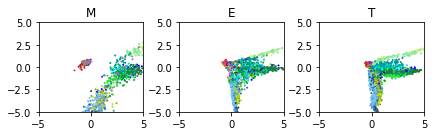

epoch: 479 loss: 4.67057 loss_rec_t: 3.00696 loss_rec_e: 0.14795 loss_rec_m: 0.58145 loss_cpl_me: 0.40855 loss_cpl_mt: 0.27588 loss_cpl_te: 0.24978 


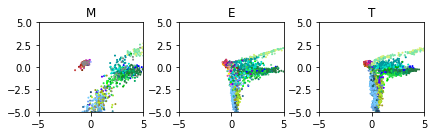

epoch: 499 loss: 4.49137 loss_rec_t: 2.98656 loss_rec_e: 0.15918 loss_rec_m: 0.62103 loss_cpl_me: 0.34613 loss_cpl_mt: 0.14965 loss_cpl_te: 0.22881 


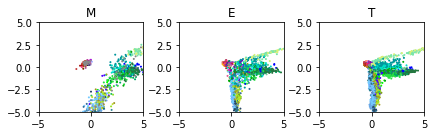

epoch: 519 loss: 4.56865 loss_rec_t: 2.94839 loss_rec_e: 0.14759 loss_rec_m: 0.61103 loss_cpl_me: 0.43679 loss_cpl_mt: 0.16623 loss_cpl_te: 0.25863 


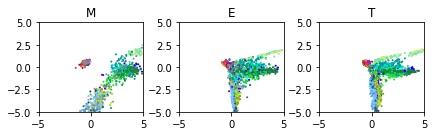

epoch: 539 loss: 4.28788 loss_rec_t: 2.89410 loss_rec_e: 0.14348 loss_rec_m: 0.60796 loss_cpl_me: 0.31339 loss_cpl_mt: 0.11528 loss_cpl_te: 0.21367 


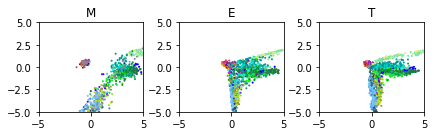

epoch: 559 loss: 4.55549 loss_rec_t: 2.90336 loss_rec_e: 0.15175 loss_rec_m: 0.60404 loss_cpl_me: 0.47699 loss_cpl_mt: 0.23818 loss_cpl_te: 0.18117 


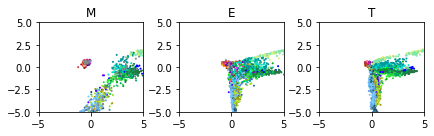

epoch: 579 loss: 4.30718 loss_rec_t: 2.91171 loss_rec_e: 0.14674 loss_rec_m: 0.62206 loss_cpl_me: 0.29182 loss_cpl_mt: 0.16685 loss_cpl_te: 0.16800 


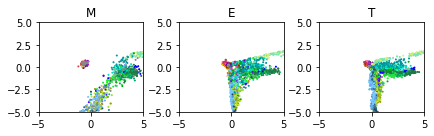

epoch: 599 loss: 4.18398 loss_rec_t: 2.86921 loss_rec_e: 0.14550 loss_rec_m: 0.60357 loss_cpl_me: 0.28027 loss_cpl_mt: 0.11987 loss_cpl_te: 0.16556 


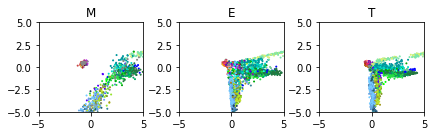

epoch: 619 loss: 4.27647 loss_rec_t: 2.86879 loss_rec_e: 0.13823 loss_rec_m: 0.62863 loss_cpl_me: 0.29157 loss_cpl_mt: 0.14247 loss_cpl_te: 0.20678 


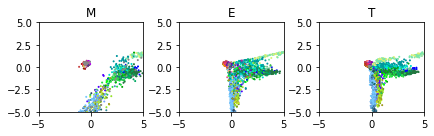

epoch: 639 loss: 4.30938 loss_rec_t: 2.86422 loss_rec_e: 0.14663 loss_rec_m: 0.62699 loss_cpl_me: 0.32739 loss_cpl_mt: 0.19900 loss_cpl_te: 0.14515 


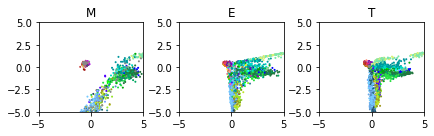

epoch: 659 loss: 4.09687 loss_rec_t: 2.84172 loss_rec_e: 0.13866 loss_rec_m: 0.59937 loss_cpl_me: 0.22685 loss_cpl_mt: 0.14519 loss_cpl_te: 0.14507 


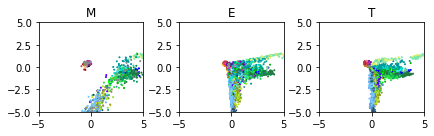

epoch: 679 loss: 4.28802 loss_rec_t: 2.81614 loss_rec_e: 0.13876 loss_rec_m: 0.61980 loss_cpl_me: 0.35607 loss_cpl_mt: 0.16668 loss_cpl_te: 0.19058 


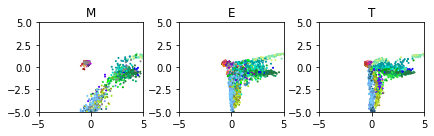

epoch: 699 loss: 4.21788 loss_rec_t: 2.83228 loss_rec_e: 0.14211 loss_rec_m: 0.63003 loss_cpl_me: 0.28952 loss_cpl_mt: 0.14523 loss_cpl_te: 0.17871 


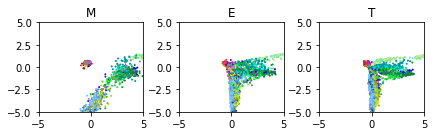

epoch: 719 loss: 4.30494 loss_rec_t: 2.80510 loss_rec_e: 0.14703 loss_rec_m: 0.64986 loss_cpl_me: 0.34225 loss_cpl_mt: 0.13857 loss_cpl_te: 0.22214 


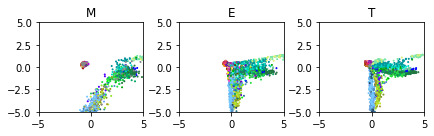

epoch: 739 loss: 3.98969 loss_rec_t: 2.79005 loss_rec_e: 0.14491 loss_rec_m: 0.63215 loss_cpl_me: 0.20031 loss_cpl_mt: 0.12210 loss_cpl_te: 0.10018 


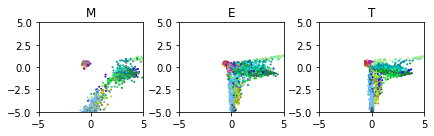

epoch: 759 loss: 3.98206 loss_rec_t: 2.79893 loss_rec_e: 0.14623 loss_rec_m: 0.62864 loss_cpl_me: 0.19852 loss_cpl_mt: 0.11041 loss_cpl_te: 0.09934 


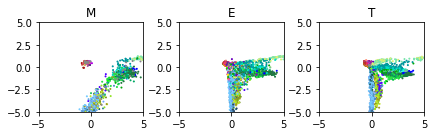

epoch: 779 loss: 3.99229 loss_rec_t: 2.76358 loss_rec_e: 0.14827 loss_rec_m: 0.63856 loss_cpl_me: 0.20439 loss_cpl_mt: 0.11501 loss_cpl_te: 0.12248 


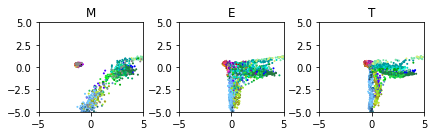

epoch: 799 loss: 3.98213 loss_rec_t: 2.76083 loss_rec_e: 0.14254 loss_rec_m: 0.57529 loss_cpl_me: 0.20705 loss_cpl_mt: 0.17303 loss_cpl_te: 0.12338 


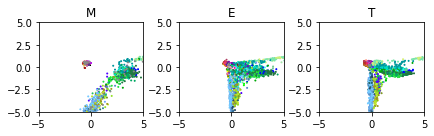

epoch: 819 loss: 3.98888 loss_rec_t: 2.75002 loss_rec_e: 0.13448 loss_rec_m: 0.61090 loss_cpl_me: 0.23776 loss_cpl_mt: 0.13302 loss_cpl_te: 0.12271 


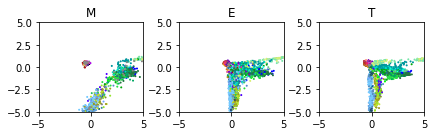

epoch: 839 loss: 4.08496 loss_rec_t: 2.77626 loss_rec_e: 0.14505 loss_rec_m: 0.62255 loss_cpl_me: 0.26941 loss_cpl_mt: 0.13010 loss_cpl_te: 0.14160 


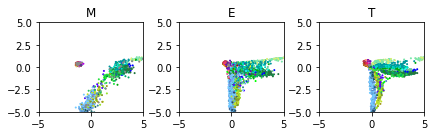

epoch: 859 loss: 3.98804 loss_rec_t: 2.74862 loss_rec_e: 0.13272 loss_rec_m: 0.63523 loss_cpl_me: 0.23950 loss_cpl_mt: 0.13654 loss_cpl_te: 0.09543 


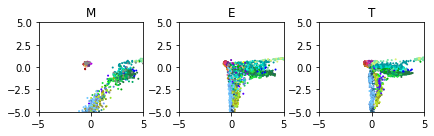

epoch: 879 loss: 3.93776 loss_rec_t: 2.73806 loss_rec_e: 0.13850 loss_rec_m: 0.62610 loss_cpl_me: 0.20499 loss_cpl_mt: 0.12823 loss_cpl_te: 0.10187 


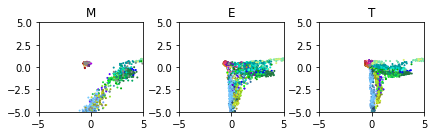

epoch: 899 loss: 3.86343 loss_rec_t: 2.73623 loss_rec_e: 0.14247 loss_rec_m: 0.62642 loss_cpl_me: 0.16900 loss_cpl_mt: 0.07263 loss_cpl_te: 0.11668 


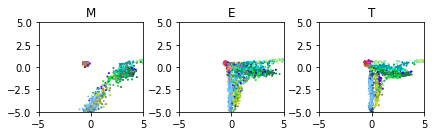

epoch: 919 loss: 3.88934 loss_rec_t: 2.74102 loss_rec_e: 0.13598 loss_rec_m: 0.61777 loss_cpl_me: 0.20693 loss_cpl_mt: 0.07693 loss_cpl_te: 0.11072 


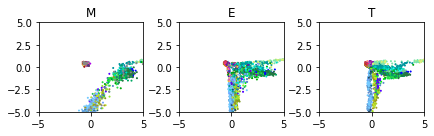

epoch: 939 loss: 3.94825 loss_rec_t: 2.73607 loss_rec_e: 0.14036 loss_rec_m: 0.60891 loss_cpl_me: 0.23025 loss_cpl_mt: 0.09384 loss_cpl_te: 0.13881 


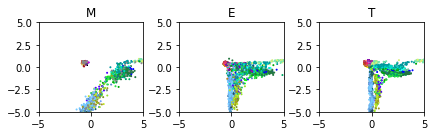

epoch: 959 loss: 3.85352 loss_rec_t: 2.70101 loss_rec_e: 0.14665 loss_rec_m: 0.60708 loss_cpl_me: 0.17888 loss_cpl_mt: 0.08707 loss_cpl_te: 0.13283 


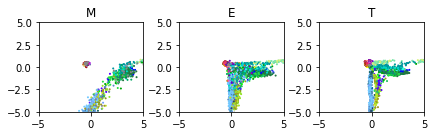

epoch: 979 loss: 3.86031 loss_rec_t: 2.69727 loss_rec_e: 0.14037 loss_rec_m: 0.61925 loss_cpl_me: 0.19083 loss_cpl_mt: 0.08310 loss_cpl_te: 0.12950 


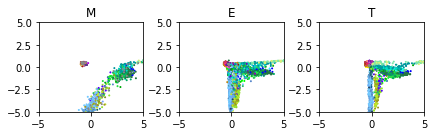

epoch: 999 loss: 3.89549 loss_rec_t: 2.70951 loss_rec_e: 0.14010 loss_rec_m: 0.61890 loss_cpl_me: 0.20887 loss_cpl_mt: 0.09605 loss_cpl_te: 0.12206 


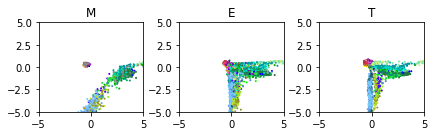

epoch: 1019 loss: 3.78303 loss_rec_t: 2.72960 loss_rec_e: 0.13332 loss_rec_m: 0.59403 loss_cpl_me: 0.13936 loss_cpl_mt: 0.08121 loss_cpl_te: 0.10551 


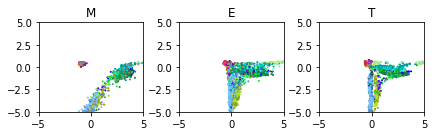

epoch: 1039 loss: 3.82996 loss_rec_t: 2.69199 loss_rec_e: 0.13742 loss_rec_m: 0.61143 loss_cpl_me: 0.18693 loss_cpl_mt: 0.09212 loss_cpl_te: 0.11007 


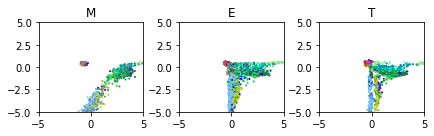

epoch: 1059 loss: 3.88496 loss_rec_t: 2.65788 loss_rec_e: 0.14362 loss_rec_m: 0.64777 loss_cpl_me: 0.20823 loss_cpl_mt: 0.13592 loss_cpl_te: 0.09154 


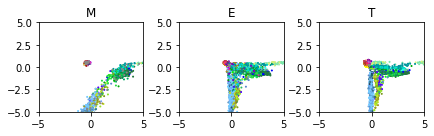

epoch: 1079 loss: 3.86727 loss_rec_t: 2.66552 loss_rec_e: 0.14809 loss_rec_m: 0.64040 loss_cpl_me: 0.18381 loss_cpl_mt: 0.08015 loss_cpl_te: 0.14929 


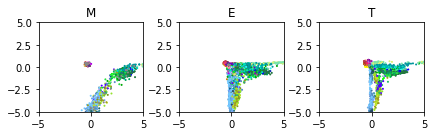

epoch: 1099 loss: 3.76994 loss_rec_t: 2.71367 loss_rec_e: 0.13378 loss_rec_m: 0.63070 loss_cpl_me: 0.13339 loss_cpl_mt: 0.06459 loss_cpl_te: 0.09381 


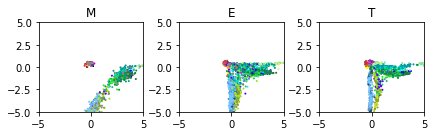

epoch: 1119 loss: 3.74602 loss_rec_t: 2.63256 loss_rec_e: 0.12853 loss_rec_m: 0.60336 loss_cpl_me: 0.19048 loss_cpl_mt: 0.10219 loss_cpl_te: 0.08888 


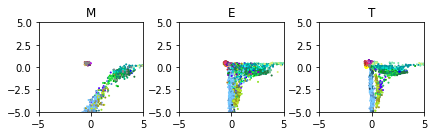

epoch: 1139 loss: 3.72957 loss_rec_t: 2.66593 loss_rec_e: 0.13005 loss_rec_m: 0.60966 loss_cpl_me: 0.15286 loss_cpl_mt: 0.07515 loss_cpl_te: 0.09591 


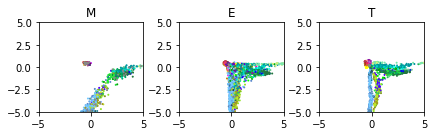

epoch: 1159 loss: 3.67804 loss_rec_t: 2.63157 loss_rec_e: 0.13202 loss_rec_m: 0.61075 loss_cpl_me: 0.13660 loss_cpl_mt: 0.07290 loss_cpl_te: 0.09419 


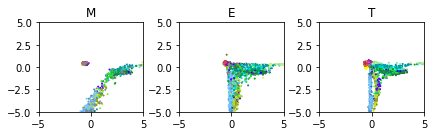

epoch: 1179 loss: 3.93005 loss_rec_t: 2.64580 loss_rec_e: 0.13377 loss_rec_m: 0.64637 loss_cpl_me: 0.25538 loss_cpl_mt: 0.08547 loss_cpl_te: 0.16326 


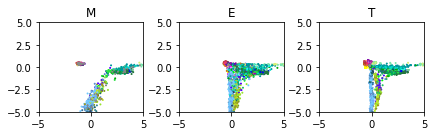

epoch: 1199 loss: 3.74920 loss_rec_t: 2.62929 loss_rec_e: 0.13517 loss_rec_m: 0.61375 loss_cpl_me: 0.18282 loss_cpl_mt: 0.05809 loss_cpl_te: 0.13009 


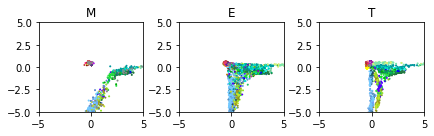

epoch: 1219 loss: 3.76555 loss_rec_t: 2.65126 loss_rec_e: 0.13441 loss_rec_m: 0.62436 loss_cpl_me: 0.17022 loss_cpl_mt: 0.08129 loss_cpl_te: 0.10402 


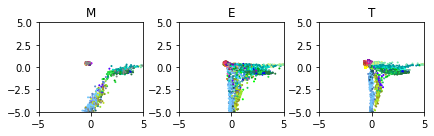

epoch: 1239 loss: 3.73851 loss_rec_t: 2.60281 loss_rec_e: 0.13310 loss_rec_m: 0.65207 loss_cpl_me: 0.15938 loss_cpl_mt: 0.09050 loss_cpl_te: 0.10066 


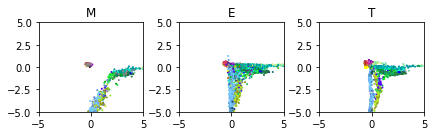

epoch: 1259 loss: 3.89505 loss_rec_t: 2.61353 loss_rec_e: 0.13257 loss_rec_m: 0.63829 loss_cpl_me: 0.26725 loss_cpl_mt: 0.07601 loss_cpl_te: 0.16740 


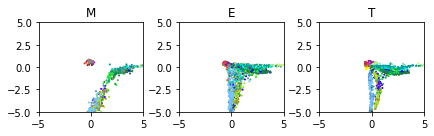

epoch: 1279 loss: 3.72562 loss_rec_t: 2.63474 loss_rec_e: 0.13838 loss_rec_m: 0.62851 loss_cpl_me: 0.14460 loss_cpl_mt: 0.09980 loss_cpl_te: 0.07959 


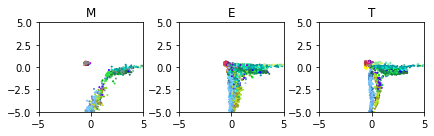

epoch: 1299 loss: 3.64815 loss_rec_t: 2.61415 loss_rec_e: 0.13665 loss_rec_m: 0.61656 loss_cpl_me: 0.13164 loss_cpl_mt: 0.06882 loss_cpl_te: 0.08032 


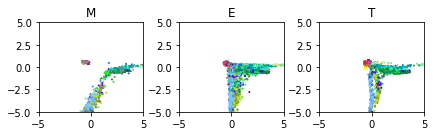

epoch: 1319 loss: 3.63618 loss_rec_t: 2.58919 loss_rec_e: 0.14094 loss_rec_m: 0.63780 loss_cpl_me: 0.11793 loss_cpl_mt: 0.04821 loss_cpl_te: 0.10211 


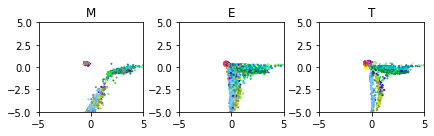

epoch: 1339 loss: 3.62815 loss_rec_t: 2.60303 loss_rec_e: 0.13656 loss_rec_m: 0.62755 loss_cpl_me: 0.11742 loss_cpl_mt: 0.04715 loss_cpl_te: 0.09644 


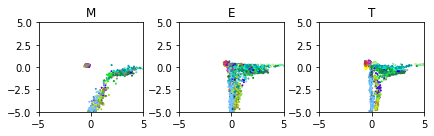

epoch: 1359 loss: 3.64520 loss_rec_t: 2.60825 loss_rec_e: 0.13800 loss_rec_m: 0.63288 loss_cpl_me: 0.11267 loss_cpl_mt: 0.07111 loss_cpl_te: 0.08230 


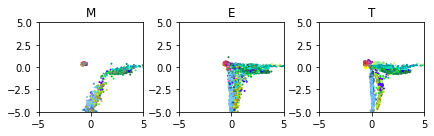

epoch: 1379 loss: 3.59180 loss_rec_t: 2.59369 loss_rec_e: 0.13705 loss_rec_m: 0.61913 loss_cpl_me: 0.10692 loss_cpl_mt: 0.07709 loss_cpl_te: 0.05793 


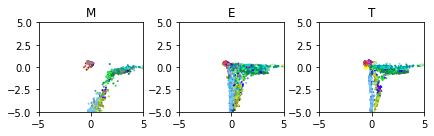

epoch: 1399 loss: 3.58009 loss_rec_t: 2.57421 loss_rec_e: 0.13968 loss_rec_m: 0.59631 loss_cpl_me: 0.12438 loss_cpl_mt: 0.05776 loss_cpl_te: 0.08775 


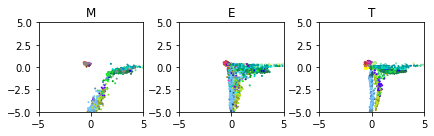

epoch: 1419 loss: 3.56949 loss_rec_t: 2.56369 loss_rec_e: 0.13640 loss_rec_m: 0.62217 loss_cpl_me: 0.11540 loss_cpl_mt: 0.04490 loss_cpl_te: 0.08692 


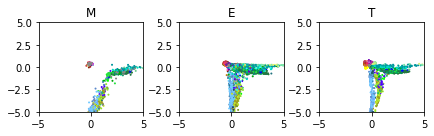

epoch: 1439 loss: 3.63886 loss_rec_t: 2.54971 loss_rec_e: 0.12857 loss_rec_m: 0.61558 loss_cpl_me: 0.15341 loss_cpl_mt: 0.06965 loss_cpl_te: 0.12195 


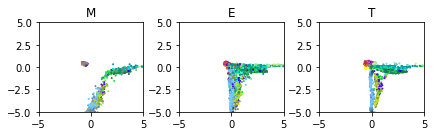

epoch: 1459 loss: 3.70388 loss_rec_t: 2.54176 loss_rec_e: 0.13247 loss_rec_m: 0.62176 loss_cpl_me: 0.21710 loss_cpl_mt: 0.07141 loss_cpl_te: 0.11938 


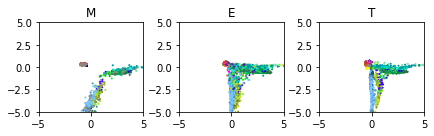

epoch: 1479 loss: 3.61778 loss_rec_t: 2.53514 loss_rec_e: 0.12817 loss_rec_m: 0.60476 loss_cpl_me: 0.17045 loss_cpl_mt: 0.07800 loss_cpl_te: 0.10126 


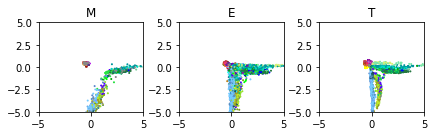

epoch: 1499 loss: 3.76160 loss_rec_t: 2.59064 loss_rec_e: 0.12984 loss_rec_m: 0.64502 loss_cpl_me: 0.20270 loss_cpl_mt: 0.10234 loss_cpl_te: 0.09107 


In [7]:
for epoch in range(0,1500,1):
    for step, batch in enumerate(iter(train_dataloader)):
        xm=batch['xm']
        xsd=batch['xsd']
        xe=batch['xe']
        xt=batch['xt']
        valid_xm=batch['valid_xm']
        valid_xsd=batch['valid_xsd']
        valid_xe=batch['valid_xe']
        valid_xt=batch['valid_xt']
        is_m_1d=batch['is_m_1d']
        is_e_1d=batch['is_e_1d']
        is_t_1d=batch['is_t_1d']
        is_me_1d=batch['is_me_1d']
        is_met_1d=batch['is_met_1d']
        
        optimizer.zero_grad()

        _, zm, _, xrm, xrsd = ae_m(xm, xsd)
        _, ze, _, xre = ae_e(xe)
        zt, xrt = ae_t(xt)

        # reconstruction losses
        loss_rec_t = torch.mean(torch.masked_select(torch.square(xt-xrt), valid_xt))
        loss_rec_e = torch.mean(torch.masked_select(torch.square(xe-xre), valid_xe))
        loss_rec_m = torch.mean(torch.masked_select(torch.square(xm-xrm), valid_xm))
        loss_rec_sd = torch.mean(torch.masked_select(torch.square(xsd-xrsd), valid_xsd))

        # calculate coupling only on met cells
        zm_is_met = zm[is_met_1d,...]
        ze_is_met = ze[is_met_1d,...]
        zt_is_met = zt[is_met_1d,...]

        loss_cpl_me = min_var_loss(zm_is_met, ze_is_met)
        loss_cpl_mt = min_var_loss(zm_is_met, zt_is_met)
        loss_cpl_te = min_var_loss(zt_is_met, ze_is_met)

        loss = loss_rec_t + loss_rec_e + loss_rec_m + 0*loss_rec_sd \
            + loss_cpl_me + loss_cpl_mt + loss_cpl_te

        loss.backward()
        optimizer.step()


        if (((epoch+1) % 20) == 0) & (step == 0):

            with torch.no_grad():
                dataset = next(iter(dataloader))
                ae_m.eval()
                ae_e.eval()
                ae_t.eval()
                _, zm, _, xrm, xrsd = ae_m(dataset['xm'], dataset['xsd'])
                _, ze, _, xre = ae_e(dataset['xe'])
                zt, xrt = ae_t(dataset['xt'])
                ae_m.train()
                ae_e.train()
                ae_t.train()
                plot_z(zm,ze,zt,dat)


            tonumpy = lambda x:x.detach().to('cpu').numpy()
            print(f'epoch: {epoch} loss: {tonumpy(loss):0.5f} ' \
                + f'loss_rec_t: {tonumpy(loss_rec_t):0.5f} ' \
                + f'loss_rec_e: {tonumpy(loss_rec_e):0.5f} ' \
                + f'loss_rec_m: {tonumpy(loss_rec_m):0.5f} ' \
                + f'loss_cpl_me: {tonumpy(loss_cpl_me):0.5f} ' \
                + f'loss_cpl_mt: {tonumpy(loss_cpl_mt):0.5f} ' \
                + f'loss_cpl_te: {tonumpy(loss_cpl_te):0.5f} ')

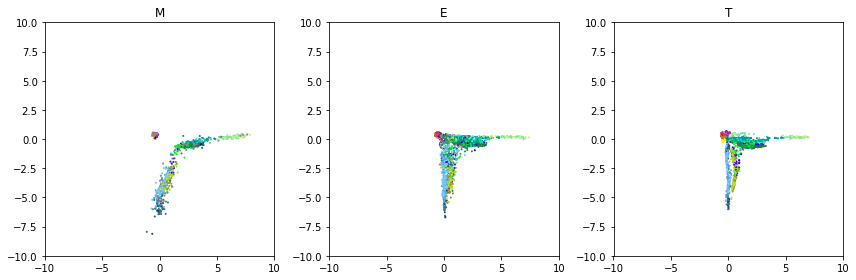

In [11]:
with torch.no_grad():
    dataset = next(iter(dataloader))
    ae_m.eval()
    ae_e.eval()
    ae_t.eval()
    _, zm, _, xrm, xrsd = ae_m(dataset['xm'], dataset['xsd'])
    _, ze, _, xre = ae_e(dataset['xe'])
    zt, xrt = ae_t(dataset['xt'])
    ae_m.train()
    ae_e.train()
    ae_t.train()

def plot_z(zm,ze,zt,dat,xlim=(-5,5),ylim=(-5,5)):
    tonumpy = lambda x:x.detach().to('cpu').numpy()
    zt = tonumpy(zt)
    ze = tonumpy(ze)
    zm = tonumpy(zm)
    f,ax = plt.subplots(1,3, figsize=(12,4))
    ax[0].scatter(zm[:,0],zm[:,1],c=dat.cluster_color,s=1)
    ax[0].set(title='M')
    ax[1].scatter(ze[:,0],ze[:,1],c=dat.cluster_color,s=1)
    ax[1].set(title='E')
    ax[2].scatter(zt[:,0],zt[:,1],c=dat.cluster_color,s=1)
    ax[2].set(title='T')
    for a in ax: a.set(xlim=xlim, ylim=ylim)
    plt.tight_layout()
    plt.show()

plot_z(zm,ze,zt,dat,xlim=(-10,10),ylim=(-10,10))

In [14]:
zt = tonumpy(zt)
ze = tonumpy(ze)
zm = tonumpy(zm)
df = pd.DataFrame(dict(ze0=ze[:, 0], ze1=ze[:, 1],
                       zm0=zm[:, 0], zm1=zm[:, 1],
                       zt0=zt[:, 0], zt1=zt[:, 1],
                       paired=np.logical_and(dat.isM_1d, dat.isT_1d),
                       color=dat.cluster_color,
                       id=dat.specimen_id,
                       cluster=dat.cluster_label))

In [21]:
fig = px.scatter(df,
                 x="zm0", y="zm1", color="paired",
                 hover_data=["id", "cluster"],
                 color_discrete_map=dict(zip(df.cluster, df.color)),
                 range_x=(-2.5,10),
                 range_y=(-10,2.5),
                 width=600,height=400)
fig.show()

fig = px.scatter(df,
                 x="ze0", y="ze1", color="paired",
                 hover_data=["id", "cluster"],
                 color_discrete_map=dict(zip(df.cluster, df.color)),
                 range_x=(-2.5,10),
                 range_y=(-10,2.5),
                 width=600,height=400)
fig.show()

fig = px.scatter(df,
                 x="zt0", y="zt1", color="paired",
                 hover_data=["id", "cluster"],
                 color_discrete_map=dict(zip(df.cluster, df.color)),
                 range_x=(-2.5,10),
                 range_y=(-10,2.5),
                 width=600,height=400)
fig.show()